# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Описание данных:

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах(м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [123]:
#Импорт библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#Считаем датасет
#Чтобы данные не склеились в одну строку из-за разделителей в формате csv, вставим как разделитель знак табуляции '\t'
data_flat = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data_flat

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [125]:
# Изучим основноую информацию о датасете
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

### Для корректного отбражения датасета необходимо указать разделитель. В таблице 22 столбца и 23699 строк. Наимнования столбцов указывают на информацию о квартире и ее местоположении. В таблице данные разных типов, имеются пропуски. Пропуски в высоте потолков, размерах жилой площади и кухни скорее всего говорят о том, что они стандартных размеров. Исходя из этого, по среднему значению или медиане будут заполнены пропуски. Информацию о наличие балкона, водоемов, парка, возможно, сочли не нужной и она не была обязательна для заполнения (заполнялась пользователями). Пропуски в количестве дней, в течение которых висело объявление до продажи кварир

### Шаг 2. Предобработка данных

##### 1) Изучим пропуски

In [126]:
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### В большинстве столбцов имеются пропуски
#### Рассмотрим в первую очередь интересующие нас для исследования столбцы. В столбцах площадь, цена и число комнат пропусков нет. Однако высота потолков часто пропущена.

In [127]:
#Изучим высоту потолков в квартирах
data_flat['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [128]:
#Посмотрим линейную корреляцию высоты потолков с остальными параметрами
data_flat.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


#### Судя по всему, высота потолков не зависит напрямую от размера квариры, количества комнат и т д. Скорее всего, она зависит от типа жилья (например, в хрущевках потолок ниже, чем в новостройках). У нас нет года постройки каждого из домов, поэтому рассчитаем среднее значение (или медиану, если будут выбросы) для самых разных населенных пунктов и по такому принципу заполним пропуски.

##### Минимальное значение в 1 м и максимальное в 100м явно ошибочны. Скорее всего, если высота потолклв в квартире "обычная", то люди этого и не указывали. Среднее значение 2.78 метра похоже на правду, так как в Росии средняя высота потолков в хрущевках 2.4 метра, а в новостройках 2.5-2.7 метров. Высота потолков в элитном жилье может оставлять больше 3 метров. 

In [129]:
#Создадим столбец, в котором удут медианы высот потолков по городам
data_flat['ceiling_height_median'] = 0

In [130]:
# Введем функцию, которая считает медианы высоты потолков по городам и выдает с ними столбец
def ceiling_heigh(row):
    row[22] = data_flat.loc[data_flat['locality_name'] == row[14], 'ceiling_height'].median()
    return row[22]

In [131]:
#Применем ее к нашему датасету 
data_flat['ceiling_height_median'] = data_flat.apply(ceiling_heigh, axis = 1)

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [132]:
# Заменим пропуски медианами
data_flat.loc[data_flat['ceiling_height'].isnull() == True, 'ceiling_height'] = data_flat['ceiling_height_median']

In [133]:
# Проверим заполнение пропусков
data_flat['ceiling_height'].describe()

count    23543.000000
mean         2.734102
std          1.012723
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

#### Часть пропусков не было заполнено, так как некоторые населенные пункты имеются только в единственном количестве, либо все значения высоты потолков для конкретного города пропущены. Избавимся от отсавшихся пропусков удалением строчек с ними, так как иначе их не заполнить

In [134]:
#Избавляемся от строк с пропусками
data_flat.drop(data_flat[data_flat['ceiling_height'].isnull() == True].index, inplace=True)

<font color=green>Строительство, в основном, типовое, поэтому одинаковые дома обладают схожими характеристиками. Можно было бы заполнить пропуски в высоте потолков на основании числа этажей в доме. 
    
---

In [135]:
#Изучим размеры жилой площади
data_flat['living_area'].describe()

count    21669.000000
mean        34.477071
std         22.068520
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

##### Предположим, что размер жилой площади зависит от площади квартиры и количества комнат.Выясним,какую часть общей площади квартиры занимает жилая площадь для однокомнатной, двухкомнатной и т д квартир

In [136]:
# Посмотрим, сколько комнат в квартирах из датасета
data_flat['rooms'].value_counts()

1     8002
2     7871
3     5779
4     1175
5      326
0      195
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

##### Большинство квартил имеют 0, 1, 2, 3, 4, 5, 6 или 7 комнаты. Рассчитаем в первую очередь для них, какую часть квартиры в среднем занимает жилая площадь. И далее домножим на полученный процент общую площадь тех квартир, в которых отсутствует информация о плозади жидого помещения.

In [137]:
#Рассчитаем медианы для разного количества комнат
print ((data_flat.loc[(data_flat['rooms'] == 0) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 0) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 1) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 1) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 2) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 2) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 3) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 3) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 4) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 4) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 5) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 5) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 6) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 6) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 7) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 7) & (data_flat['living_area'].isnull() == False), 'total_area']).median())
print ((data_flat.loc[(data_flat['rooms'] == 9) & (data_flat['living_area'].isnull() == False), 'living_area']/data_flat.loc[(data_flat['rooms'] == 9) & (data_flat['living_area'].isnull() == False), 'total_area']).median())

0.6896551724137931
0.48245614035087714
0.5851063829787234
0.6316666666666666
0.6594614550057261
0.6518423782149324
0.6794117647058824
0.6816702819956616
0.6282513005202081


In [138]:
# Заполним пропуски
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 0), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 0), 'total_area'] * 0.69
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 1), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 1), 'total_area'] * 0.48
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 2), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 2), 'total_area'] * 0.585
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 3), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 3), 'total_area'] * 0.63
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 4), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 4), 'total_area'] * 0.66
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 5), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 5), 'total_area'] * 0.65
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 6), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 6), 'total_area'] * 0.68
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 7), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 7), 'total_area'] * 0.68
data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 9), 'living_area'] = data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 9), 'total_area'] * 0.63

In [139]:
#Посмотрим, все ли пропуски были заполне
data_flat['living_area'].isna().mean()

0.0

In [140]:
# Пропуски, которые мы должны обработать. Индексы совсем не с 0 начинаются. 
#data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 0), 'living_area']

In [141]:
# По этим данным ты заполняешь пропуски. Индексы от нуля. Для заполнения пропусков у разных квартир ты каждый раз берешь эти данные
#data_flat['total_area']

In [142]:
# Данные, которые стоит брать для заполнения пропусков в жилой площади
#data_flat.loc[(data_flat['living_area'].isnull() == True) & (data_flat['rooms'] == 0), 'total_area']

##### Все пропуски в жилой площади были заполнены. Рассмотрим пропуски населенных пунктов. Так как их вряд ли получится восстановить, заполним значением 'no_info'. Теоретически, можно было бы попробовать соотнести расстояние до аэропорта с названием населенного пункта и постараться восстановить хотя б часть пропусков, но и в расстоянии до аэропорта имеется достаточно много пропусков.


In [143]:
#Рассмотрим наличие пропусков в названии населенного пункта
data_flat['locality_name'].isna().mean()

0.000594656585821688

In [144]:
#Произведем замену
data_flat['locality_name'] = data_flat['locality_name'].fillna('no_info') 

In [145]:
#Проверим замену
data_flat['locality_name'].isna().mean()

0.0

##### Пропуски в населенном пункте были заполнены

In [146]:
#Рассморим, где еще остались пропуски
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23543 non-null int64
last_price               23543 non-null float64
total_area               23543 non-null float64
first_day_exposition     23543 non-null object
rooms                    23543 non-null int64
ceiling_height           23543 non-null float64
floors_total             23459 non-null float64
living_area              23543 non-null float64
floor                    23543 non-null int64
is_apartment             2754 non-null object
studio                   23543 non-null bool
open_plan                23543 non-null bool
kitchen_area             21302 non-null float64
balcony                  12090 non-null float64
locality_name            23543 non-null object
airports_nearest         18123 non-null float64
cityCenters_nearest      18146 non-null float64
parks_around3000         18147 non-null float64
parks_nearest            8071 non-null floa

##### Рассмотри пропуски в площади кухни

In [147]:
data_flat['kitchen_area'].describe()

count    21302.000000
mean        10.577394
std          5.909206
min          1.300000
25%          7.000000
50%          9.200000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [148]:
#Посмотрим линейную корреляцию площади кухни с остальными параметрами
data_flat.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median
total_images,1.000000,0.104268,0.115762,0.099387,0.004098,0.008698,0.100879,0.030376,-0.029066,-0.024347,0.105754,0.121847,-0.001934,-0.047576,0.021183,-0.008180,-0.011465,-0.003344,-0.027564,0.007364
last_price,0.104268,1.000000,0.653738,0.363747,0.064932,-0.009160,0.586318,0.025297,-0.025422,-0.008661,0.519998,0.028999,-0.026364,-0.206935,0.151027,-0.016386,0.160370,-0.085086,0.080862,0.023387
total_area,0.115762,0.653738,1.000000,0.758873,0.079266,-0.077526,0.946750,-0.025485,-0.072594,-0.034445,0.608830,0.047733,-0.031107,-0.232006,0.164720,-0.021425,0.163229,-0.098515,0.149726,0.020191
rooms,0.099387,0.363747,0.758873,1.000000,0.046023,-0.229946,0.826230,-0.151720,-0.147093,-0.086826,0.270784,0.018071,-0.061050,-0.184459,0.136890,-0.054304,0.093358,-0.058572,0.126570,0.006891
ceiling_height,0.004098,0.064932,0.079266,0.046023,1.000000,-0.020157,0.077499,-0.008103,0.001246,0.018856,0.071699,0.039440,-0.020091,-0.086202,0.056075,-0.017607,0.063305,-0.047213,0.017627,0.321836
floors_total,0.008698,-0.009160,-0.077526,-0.229946,-0.020157,1.000000,-0.160810,0.677148,0.069650,0.051909,0.163388,0.194420,0.108886,0.019569,-0.252774,0.097468,-0.123399,0.039418,-0.053535,0.041684
living_area,0.100879,0.586318,0.946750,0.826230,0.077499,-0.160810,1.000000,-0.089766,-0.054874,-0.021594,0.436539,0.018142,-0.051903,-0.228211,0.177390,-0.049216,0.148989,-0.085233,0.142614,0.017119
floor,0.030376,0.025297,-0.025485,-0.151720,-0.008103,0.677148,-0.089766,1.000000,0.037113,0.036494,0.135621,0.169409,0.072095,0.009011,-0.163510,0.073021,-0.076683,0.025773,-0.040240,0.028423
studio,-0.029066,-0.025422,-0.072594,-0.147093,0.001246,0.069650,-0.054874,0.037113,1.000000,-0.004217,NaN,0.031258,-0.021524,-0.008240,-0.029839,0.009125,-0.000082,0.001824,-0.022361,0.004042
open_plan,-0.024347,-0.008661,-0.034445,-0.086826,0.018856,0.051909,-0.021594,0.036494,-0.004217,1.000000,NaN,0.019686,-0.013606,-0.004201,-0.010110,0.010607,0.008460,-0.003353,-0.024134,0.030275


##### Площадь кухни коррелирует с общей площадью квартиры, но для заполнения в зависимости от нее придется разбивать пощадь квартир на категории.

In [149]:
#Рассмотрим размеры квартир
data_flat['total_area'].describe()

count    23543.000000
mean        60.396122
std         35.726860
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [150]:
#Рассмотрим отношение размера кухни к общей площади кухни по категориям
print((data_flat.loc[(data_flat['total_area'] <= 40), 'kitchen_area']/data_flat.loc[(data_flat['total_area'] <= 40), 'total_area']).median())
print((data_flat.loc[(data_flat['total_area'] > 40) & (data_flat['total_area'] <= 52), 'kitchen_area']/data_flat.loc[(data_flat['total_area'] > 40) & (data_flat['total_area'] <= 52), 'total_area']).median())
print((data_flat.loc[(data_flat['total_area'] > 52) & (data_flat['total_area'] <= 70), 'kitchen_area']/data_flat.loc[(data_flat['total_area'] <= 70) & (data_flat['total_area'] > 52), 'total_area']).median())
print((data_flat.loc[(data_flat['total_area'] > 70) & (data_flat['total_area'] <= 150), 'kitchen_area']/data_flat.loc[(data_flat['total_area'] > 70) & (data_flat['total_area'] <= 150), 'total_area']).median())
print((data_flat.loc[(data_flat['total_area'] > 150), 'kitchen_area']/data_flat.loc[(data_flat['total_area'] > 150), 'total_area']).median())

0.23684210526315788
0.16519823788546256
0.1540881514219926
0.14005258122905184
0.10807563338301043


In [151]:
data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] <= 40), 'kitchen_area'] = data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] <= 40), 'total_area'] * 0.24
data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] >40) & (data_flat['total_area'] <= 52), 'kitchen_area'] = data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] >40) & (data_flat['total_area'] <= 52),'total_area'] * 0.165
data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] >52) & (data_flat['total_area'] <= 70), 'kitchen_area'] = data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] >52) & (data_flat['total_area'] <= 70),'total_area'] * 0.15
data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] >70) & (data_flat['total_area'] <= 150), 'kitchen_area'] = data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] >70) & (data_flat['total_area'] <= 150),'total_area'] * 0.14
data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] >150), 'kitchen_area'] = data_flat.loc[(data_flat['kitchen_area'].isnull() == True) & (data_flat['total_area'] > 150), 'total_area'] * 0.11

In [152]:
#Сделаем проверку
data_flat['kitchen_area'].isna().mean()

0.0

##### Пропуски в площади кухни были заплнены. Пропуски в количестве дней, через которое объявление было снято, оставим как есть. Возможно, квартиры так и не были проданы. 

##### Все пропуски в количестве дней размещения были устранены

##### 2) Приведем данные к нужному типу

In [153]:
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23543 non-null int64
last_price               23543 non-null float64
total_area               23543 non-null float64
first_day_exposition     23543 non-null object
rooms                    23543 non-null int64
ceiling_height           23543 non-null float64
floors_total             23459 non-null float64
living_area              23543 non-null float64
floor                    23543 non-null int64
is_apartment             2754 non-null object
studio                   23543 non-null bool
open_plan                23543 non-null bool
kitchen_area             23543 non-null float64
balcony                  12090 non-null float64
locality_name            23543 non-null object
airports_nearest         18123 non-null float64
cityCenters_nearest      18146 non-null float64
parks_around3000         18147 non-null float64
parks_nearest            8071 non-null floa

In [154]:
# Для удобства поменяем тип данных в is_apartment на boolean
try:
    data_flat['is_apartment'] = data_flat['is_apartment'].astype('bool')  
except:
        print('Ошибка при переводe')

In [155]:
# Для удобства поменяем тип данных в locality_name на string
try:
    data_flat['locality_name'] = data_flat['locality_name'].astype('str')  
except:
        print('Ошибка при переводe')

In [156]:
# Для удобства поменяем тип данных в days_exposition на int
try:
    data_flat['days_exposition'] = data_flat['days_exposition'].astype('int')  
except:
        print('Ошибка при переводe')

Ошибка при переводe


In [157]:
# Проверяем замены
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23543 non-null int64
last_price               23543 non-null float64
total_area               23543 non-null float64
first_day_exposition     23543 non-null object
rooms                    23543 non-null int64
ceiling_height           23543 non-null float64
floors_total             23459 non-null float64
living_area              23543 non-null float64
floor                    23543 non-null int64
is_apartment             23543 non-null bool
studio                   23543 non-null bool
open_plan                23543 non-null bool
kitchen_area             23543 non-null float64
balcony                  12090 non-null float64
locality_name            23543 non-null object
airports_nearest         18123 non-null float64
cityCenters_nearest      18146 non-null float64
parks_around3000         18147 non-null float64
parks_nearest            8071 non-null float

##### Пропуски расстояния до центра города не получится чем-либо заменить, так же как и название населенного пункта. Иначе искать зависимость цены от расстояния до центра будет некорректно

### Вывод
### Были заменены пропуски в высоте потолков, количестве дней размещения объявления, площади кухни и жилой комнаты, названии населенного пункта. Был заменен тип object у количества дней размещений, названия населенного пункта и апартаментах для удобства дальнейшей работы

### Шаг 3. Посчитайте и добавьте в таблицу

##### 1) Цен квадратного метра

In [158]:
#Введем новый столбец, где цена квадратного метра будет равна стоимости квартиры деленной на площадь
data_flat['price_for_meter'] = data_flat['last_price']/data_flat['total_area']

In [159]:
#Проверим
data_flat.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.70,120370.370370
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.600,1,True,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2.63,82920.792079
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.300,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2.70,92785.714286
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,100.170,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2.70,408176.100629
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2.70,100000.000000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.400,5,True,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2.60,95065.789474
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.600,6,True,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2.64,99195.710456
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,41.886,22,True,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2.70,110544.692737
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.430,26,True,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2.70,87454.764777
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600,7,True,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2.70,88524.590164


##### 2) Этаж квартиры; варианты — первый, последний, другой

In [160]:
# Введем функцию, которая классифицирует этаж квартиры
def floor_category(row):
    if row[8] == 1:
        return 'первый'
    elif row[8] == row[6]:
        return 'последний'
    else:
        return 'другой'

In [161]:
#Применем ее к нашему датасету с созданием нового столбца
data_flat['floor_category'] = data_flat.apply(floor_category, axis = 1)

In [162]:
#Проверим
data_flat.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter,floor_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,True,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.70,120370.370370,другой
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.600,1,True,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2.63,82920.792079,первый
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.300,4,True,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2.70,92785.714286,другой
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,100.170,9,True,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2.70,408176.100629,другой
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,True,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2.70,100000.000000,другой
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.400,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2.60,95065.789474,другой
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.600,6,True,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2.64,99195.710456,другой
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,41.886,22,True,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2.70,110544.692737,другой
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.430,26,True,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2.70,87454.764777,другой
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600,7,True,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2.70,88524.590164,другой


##### 3) Cоотношение жилой к общей площади, а также отношение площади кухни к общей

In [163]:
#Введем новыые столбцы с отношением площали кухни или жилого помещения к общей площади квартиры
data_flat['living_to_total_area'] = data_flat['living_area']/data_flat['total_area']
data_flat['kitchen_to_total_area'] = data_flat['kitchen_area']/data_flat['total_area']

In [164]:
#Проверим
data_flat.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter,floor_category,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,True,...,1.0,482.0,2.0,755.0,NaN,2.70,120370.370370,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.600,1,True,...,0.0,NaN,0.0,NaN,81.0,2.63,82920.792079,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.300,4,True,...,1.0,90.0,2.0,574.0,558.0,2.70,92785.714286,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,100.170,9,True,...,2.0,84.0,3.0,234.0,424.0,2.70,408176.100629,другой,0.630000,0.110000
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,True,...,2.0,112.0,1.0,48.0,121.0,2.70,100000.000000,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.400,5,True,...,NaN,NaN,NaN,NaN,55.0,2.60,95065.789474,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.600,6,True,...,0.0,NaN,0.0,NaN,155.0,2.64,99195.710456,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,41.886,22,True,...,0.0,NaN,0.0,NaN,NaN,2.70,110544.692737,другой,0.585000,0.263966
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.430,26,True,...,NaN,NaN,NaN,NaN,189.0,2.70,87454.764777,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600,7,True,...,0.0,NaN,0.0,NaN,289.0,2.70,88524.590164,другой,0.714754,0.106557


##### 4) день недели, месяц и год публикации объявления

In [165]:
#Посмотрим на формат даты
data_flat['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23693    2016-08-05T00:00:00
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23543, dtype: object

In [166]:
# Приведем дату к нужному формату
data_flat['first_day_exposition'] = pd.to_datetime(data_flat['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [167]:
# Проверим
data_flat['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23693   2016-08-05
23694   2017-03-21
23695   2018-01-15
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23543, dtype: datetime64[ns]

In [168]:
#С помощью стандартной функции находим дни недели публикации
data_flat['weekday'] = data_flat['first_day_exposition'].dt.weekday

In [169]:
# Проверяем
data_flat['weekday'].value_counts()

3    4271
1    4161
4    3973
2    3946
0    3592
5    1921
6    1679
Name: weekday, dtype: int64

In [170]:
#С помощью стандартной функции находим месяц публикации
data_flat['month'] = data_flat['first_day_exposition'].dt.month

In [171]:
# Проверяем
data_flat['month'].value_counts()

2     2622
3     2568
4     2365
11    2357
10    2117
9     1971
6     1742
8     1733
7     1684
12    1628
1     1490
5     1266
Name: month, dtype: int64

In [172]:
#С помощью стандартной функции находим год публикации
data_flat['year'] = data_flat['first_day_exposition'].dt.year

In [173]:
# Проверяем
data_flat['year'].value_counts()

2018    8461
2017    8154
2019    2862
2016    2757
2015    1172
2014     137
Name: year, dtype: int64

### Вывод

### В датасет были добавлены новые столбцы с ценой квадратного метра, категоризацией этажа квартиры, днем недели, месяцем, годом публикаци объявления и соотношением жилой площади и кухни к общей площади квартиры

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра

In [174]:
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 30 columns):
total_images             23543 non-null int64
last_price               23543 non-null float64
total_area               23543 non-null float64
first_day_exposition     23543 non-null datetime64[ns]
rooms                    23543 non-null int64
ceiling_height           23543 non-null float64
floors_total             23459 non-null float64
living_area              23543 non-null float64
floor                    23543 non-null int64
is_apartment             23543 non-null bool
studio                   23543 non-null bool
open_plan                23543 non-null bool
kitchen_area             23543 non-null float64
balcony                  12090 non-null float64
locality_name            23543 non-null object
airports_nearest         18123 non-null float64
cityCenters_nearest      18146 non-null float64
parks_around3000         18147 non-null float64
parks_nearest            8071 non-nu

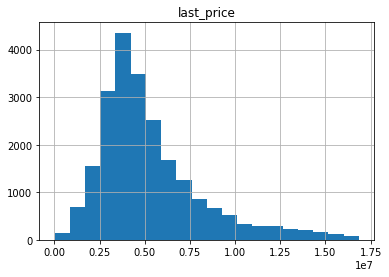

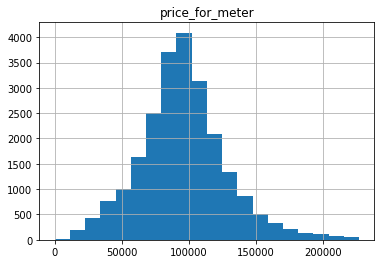

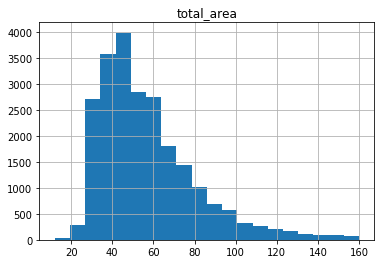

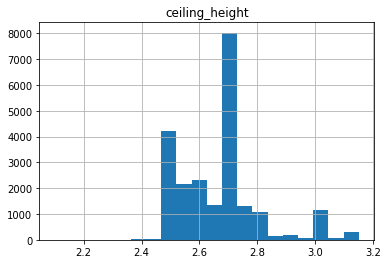

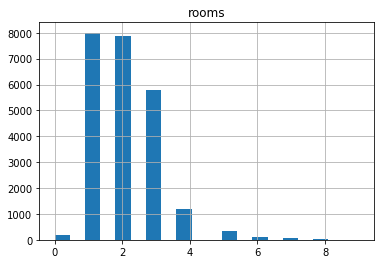

In [175]:
#Введем цикл для автоматического построения гистограмм за вечетом выбросов
data_flat_chek = data_flat.loc[:, ['last_price', 'price_for_meter', 'total_area', 'ceiling_height', 'rooms']]

for column in data_flat_chek:
   
    qr = data_flat[column].quantile(.75) - data_flat[column].quantile(.25) #считает межквартильный размах
   
    mini = data_flat[column].min() # считает нижний диапазон
    qmin = data_flat[column].quantile(.25) - qr * 3
    if qmin < mini:
        qmin = mini
    else:
        qmin = qmin
   
    maxi = data_flat[column].max() # считает верхний диапазон
    qmax = data_flat[column].quantile(.75) + qr * 3
    if qmax > maxi:
        qmax = maxi
    else:
        qmax = qmax
       
    data_flat_chek.hist(column, bins = 20, range = ((qmin), (qmax))) #строит гистограммы в нужном диапазоне

##### Гистограмма стоимости квадратного метра похожа на нормалное распределение с пиком на 100к за квадратный метр. Гистограмма стоимости квартиры скошена и имеет пик в районе 3М. При этом имеются и подозрительно маленькие и боьшие значения стоимости

##### Наиболеечастые размеры квартир  около 45 кв. метров. После 125 кв. метров имеется хвост. Но имеются и квартиры меньше 20 кв. метров.

##### Высота потолков имеет пик в районе 2.7 метров. Наиболее часто встречающаяся высота потолков 2.5-3.1 метра.

##### Чаще всего встречаются однокомнатные квартиры, реже 2-ух и 3-х комнатные.

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [176]:
# Найдем медиану и среднее
data_flat['days_exposition'].describe()

count    20389.000000
mean       181.039139
std        220.054178
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [177]:
data_flat['days_exposition'].median()

95.0

#### Значительная разница медианы и среднего значения подтверждает наличие выбросов

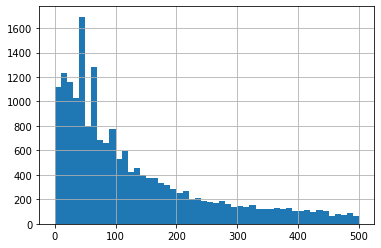

In [178]:
#Построим гистограмму по времени продажи квартиры
data_flat['days_exposition'].hist(bins=50, range = (0, 500))

#### Имеется большой пик от 0 до 25 дней. Это связано с наличием непроданных квартир. Самый большой пик около 40 дней. По статистике Сбербанка 90% квартир продаются за 3 месяца. Примем, что минимальный срок продажи квартры - 2 недели. А максимальный- 1 год. В далнейшем избавимся от неликвидных значений

#### 3) Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

#### Все гистограммы имеют хвосты. Гистограмма цены за квадратный метр имеет вид нормального распределения. Гистограмма дней до продажи квартиры больше похожа на Пуассоновское распределение.
#### Избавимся от выбросов исходя из гистограмма и прочих данных

In [179]:
#Примем срок продажи квартиры возможным от 3 недель и до 1 года
data_flat_query = data_flat.query('days_exposition > 14 & days_exposition < 365')
#Поиск по жилью Ленинградской области показал, что минимальная цена за квадратный метр всегда выше 25к
#И даже самое элитное жилье не будет стоить больше 1.1М за 1 кв. метр
data_flat_query = data_flat_query.query('price_for_meter > 25000 & price_for_meter < 1100000')
#Высота потолков в хрущевках в среднем 2.4 метра, в элитном жилье больше 3 метров
data_flat_query = data_flat_query.query('ceiling_height > 2 & ceiling_height < 5')
#На сайте недвижимости были найдены квартииры максимум с 8 комнатами. Возьмем с запасом 13 комнат как максимум.
data_flat_query = data_flat_query.query('rooms < 13') 
#Согласно САНПИНу минимальная площадь квартиры 28м, кухни 8м, жилой площади 14м. Максимум взят по анализу сайта недвижимости
data_flat_query = data_flat_query.query('total_area > 28 & total_area < 830')
data_flat_query = data_flat_query.query('living_area > 14') 
data_flat_query = data_flat_query.query('kitchen_area > 8') 


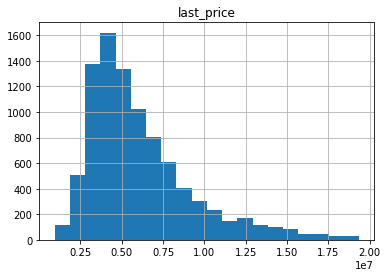

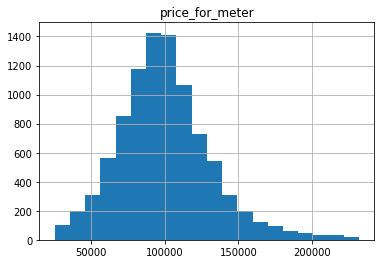

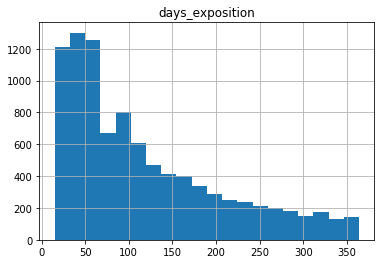

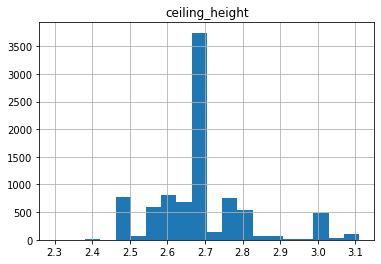

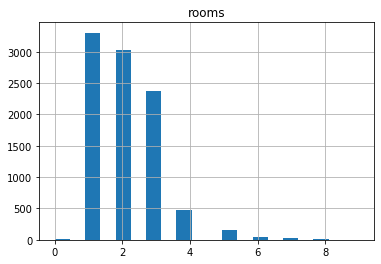

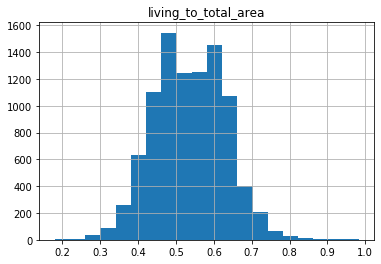

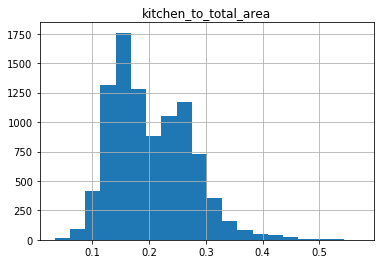

In [180]:
#Заново построим гистограммы и посмотрим на результат
data_flat_chek = data_flat_query.loc[:, ['last_price', 'price_for_meter', 'days_exposition', 'ceiling_height', 'rooms', 'living_to_total_area', 'kitchen_to_total_area']]

for column in data_flat_chek:
   
    qr = data_flat_query[column].quantile(.75) - data_flat_query[column].quantile(.25) #считает межквартильный размах
   
    mini = data_flat_query[column].min() # считает нижний диапазон
    qmin = data_flat_query[column].quantile(.25) - qr * 3
    if qmin < mini:
        qmin = mini
    else:
        qmin = qmin
   
    maxi = data_flat_query[column].max() # считает верхний диапазон
    qmax = data_flat_query[column].quantile(.75) + qr * 3
    if qmax > maxi:
        qmax = maxi
    else:
        qmax = qmax
       
    data_flat_chek.hist(column, bins = 20, range = ((qmin), (qmax))) #строит гистограммы в нужном диапазоне

#### Гистограмма цены за квадратный метр еще больше стала похожа на нормальное распределение. На гистограмме дней до продажи квартиры имеется явный пик примерно 1.5 месяца.

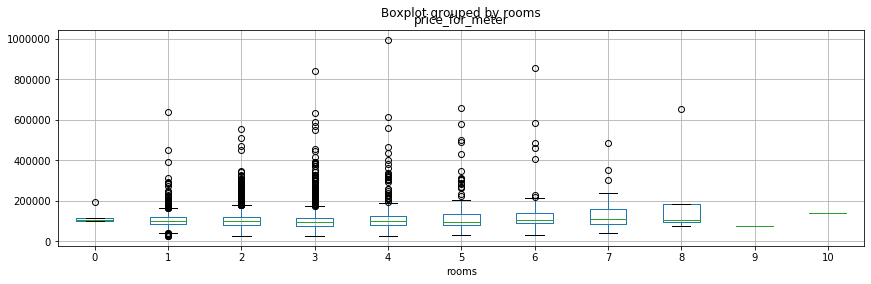

In [181]:
#Визуализируем данные для зависимоти цены квадратного метра от числа комнат с помощью графика boxplot
data_flat_query.boxplot('price_for_meter', by = 'rooms', figsize = (14, 4))

#### Данные были очищены от выбросов

#### 4) Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [182]:
#Посмотрим линейную корреляцию цены за квадратный метр с остальными параметрами
data_flat_query.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter,living_to_total_area,kitchen_to_total_area,weekday,month,year
total_images,1.000000,0.104200,0.096969,0.088955,0.047204,-0.021604,0.081713,0.007523,0.031495,-0.008339,...,-0.008457,0.011382,0.033367,0.036938,0.135190,0.025562,-0.039759,-0.024416,0.032948,0.114194
last_price,0.104200,1.000000,0.714169,0.428371,0.309237,-0.095949,0.649422,-0.032901,0.010978,-0.003818,...,0.178117,-0.110219,0.079901,0.152727,0.733365,0.126351,-0.203036,-0.003172,-0.000303,-0.035506
total_area,0.096969,0.714169,1.000000,0.785689,0.349075,-0.199670,0.945654,-0.107751,0.003974,-0.008534,...,0.166637,-0.094733,0.112186,0.089290,0.290652,0.334262,-0.485048,0.001514,-0.005325,-0.065666
rooms,0.088955,0.428371,0.785689,1.000000,0.254308,-0.285366,0.841469,-0.190870,0.005886,-0.029445,...,0.118401,-0.056935,0.096655,0.013986,0.082870,0.622327,-0.663439,0.002975,-0.001985,-0.057520
ceiling_height,0.047204,0.309237,0.349075,0.254308,1.000000,-0.164949,0.345476,-0.094841,-0.025228,-0.000121,...,0.180335,-0.103402,0.087368,0.270469,0.295580,0.109265,-0.103742,-0.002460,0.001602,-0.024798
floors_total,-0.021604,-0.095949,-0.199670,-0.285366,-0.164949,1.000000,-0.252355,0.651554,0.011572,-0.009590,...,-0.208876,0.092704,-0.066467,0.285316,0.058240,-0.303438,0.245679,0.024005,-0.001130,0.033536
living_area,0.081713,0.649422,0.945654,0.841469,0.345476,-0.252355,1.000000,-0.152735,0.004936,-0.003513,...,0.158295,-0.075614,0.104712,0.065323,0.236770,0.572133,-0.584174,0.004302,-0.008941,-0.059793
floor,0.007523,-0.032901,-0.107751,-0.190870,-0.094841,0.651554,-0.152735,1.000000,0.012780,-0.003239,...,-0.124366,0.057716,-0.052177,0.182885,0.068340,-0.222864,0.171079,0.025057,0.014445,0.020410
is_apartment,0.031495,0.010978,0.003974,0.005886,-0.025228,0.011572,0.004936,0.012780,1.000000,-0.011920,...,-0.014445,0.004654,-0.076595,0.015606,0.010881,0.003372,0.003738,0.006023,0.149386,0.302755
studio,-0.008339,-0.003818,-0.008534,-0.029445,-0.000121,-0.009590,-0.003513,-0.003239,-0.011920,1.000000,...,-0.003161,-0.010476,0.003724,0.007379,0.002913,0.020472,0.000624,-0.002623,-0.001388,-0.015873


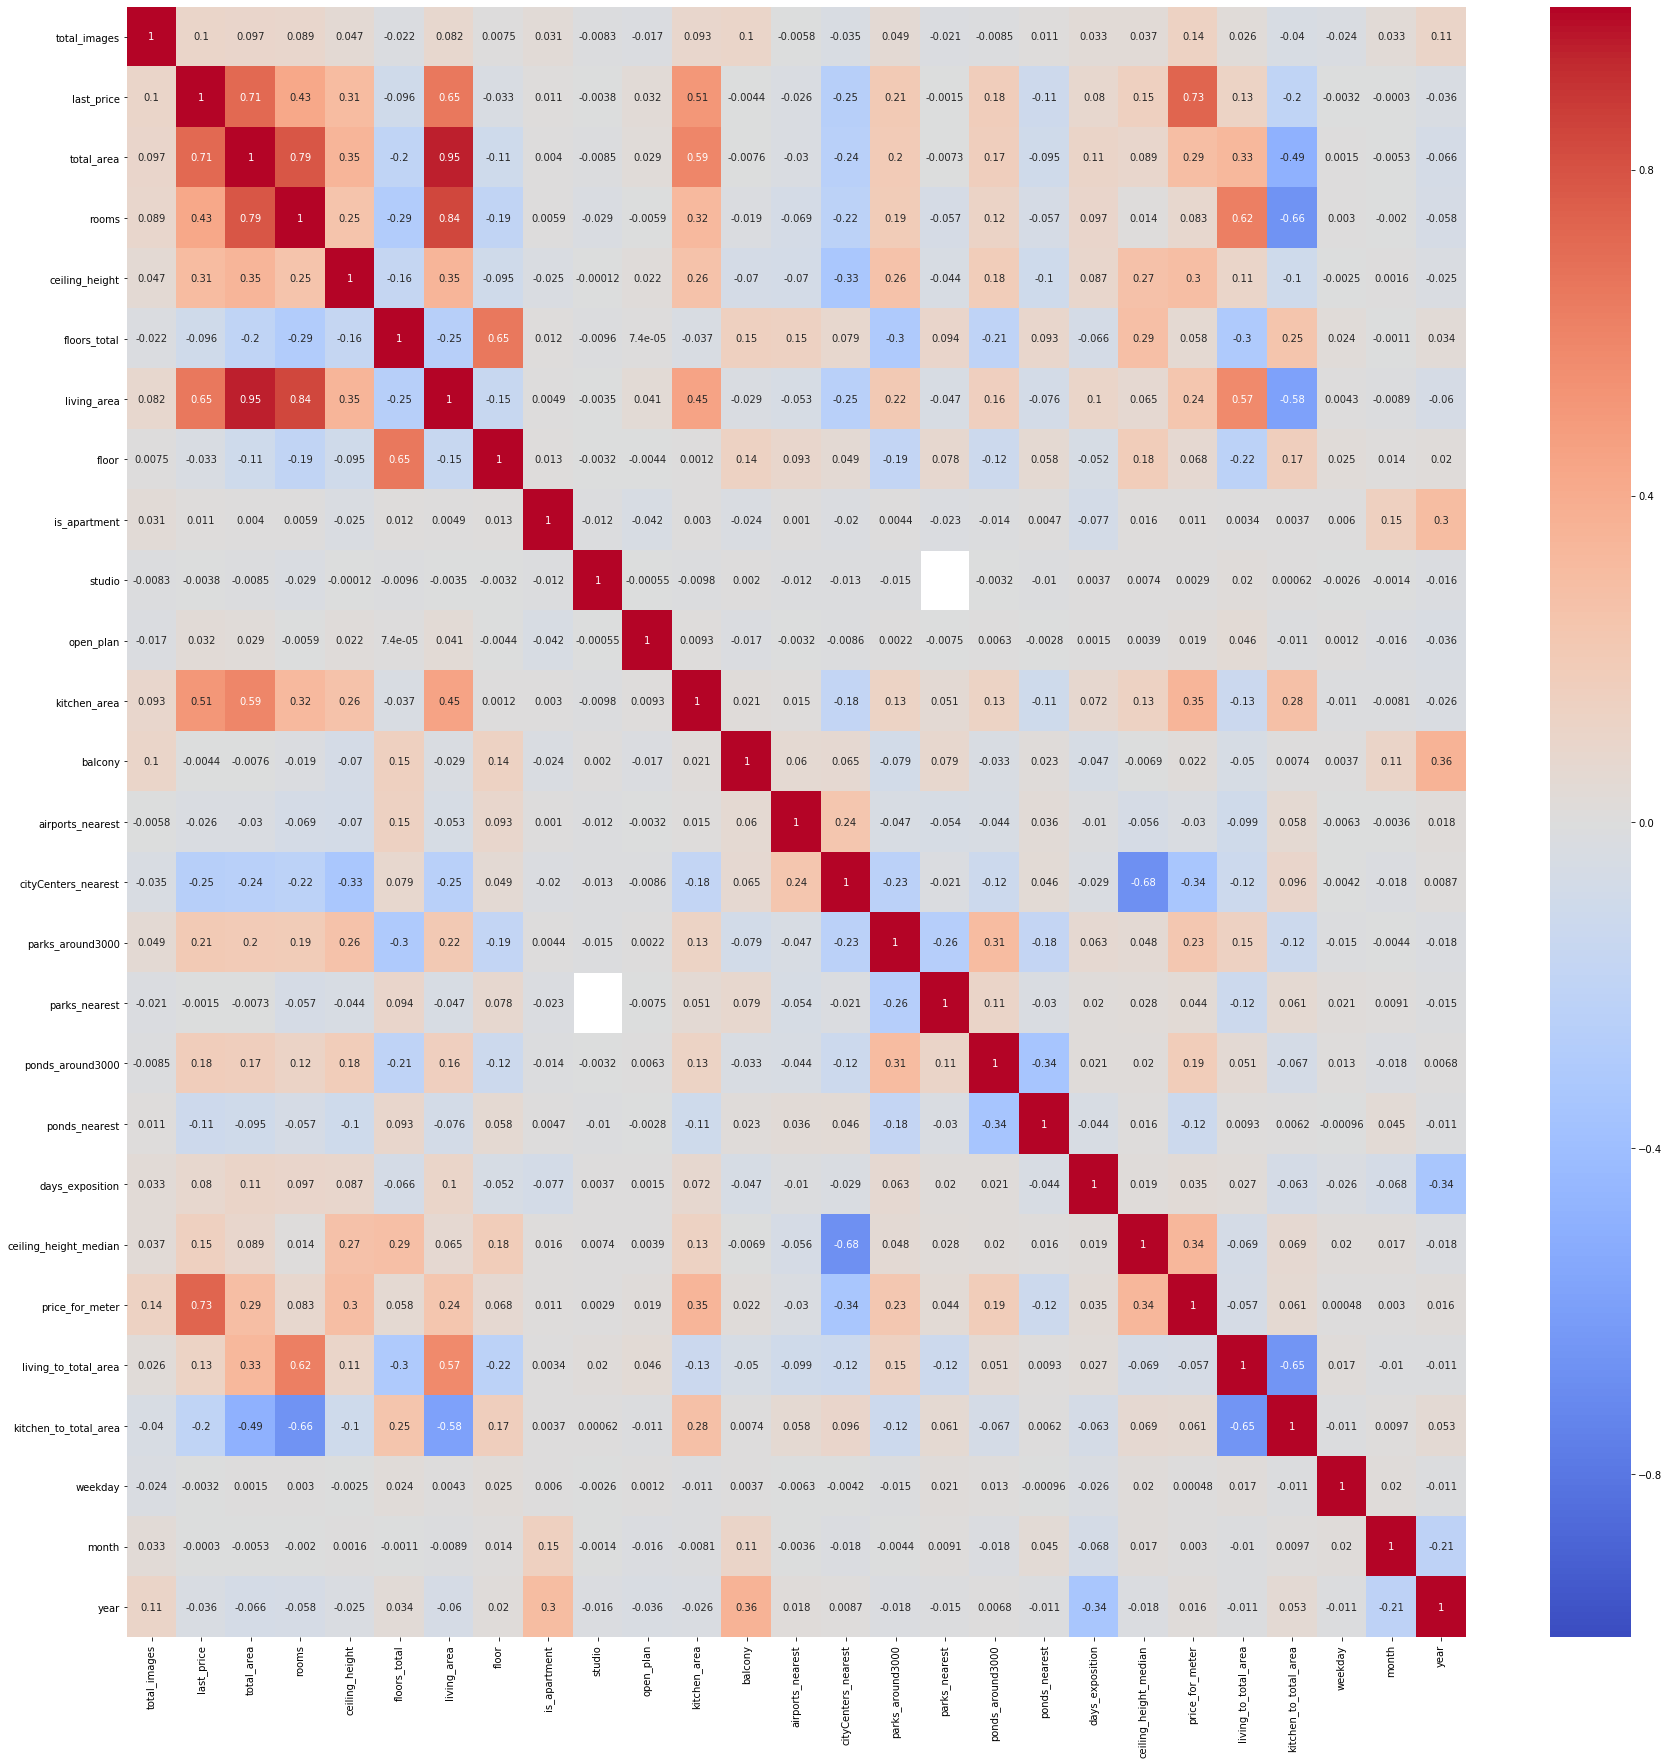

In [183]:
#Визуализируем матрицу корреляции
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data_flat_query.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax = ax)

<font color=green> Такую таблицу анализировать сложно. Поэтому ее лучше визуализировать с помощью метода heatmap из библиотеки seaborn. 
    
---

#### Есть некоторая корреляция между стоимостью квадратного метра и размером квартиры, высотой потолков, размером кухни, наличием парков. Отрицательная корреляция с расстоянием до центра

In [184]:
#Выделим параметры стоимость квадратного метра, площадь квартиры, количество комнат в отдельную таблицу
data_flat_query_matrix = data_flat_query.loc[:, ['price_for_meter', 'total_area', 'rooms']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21dbb4c490>,
      dtype=object)

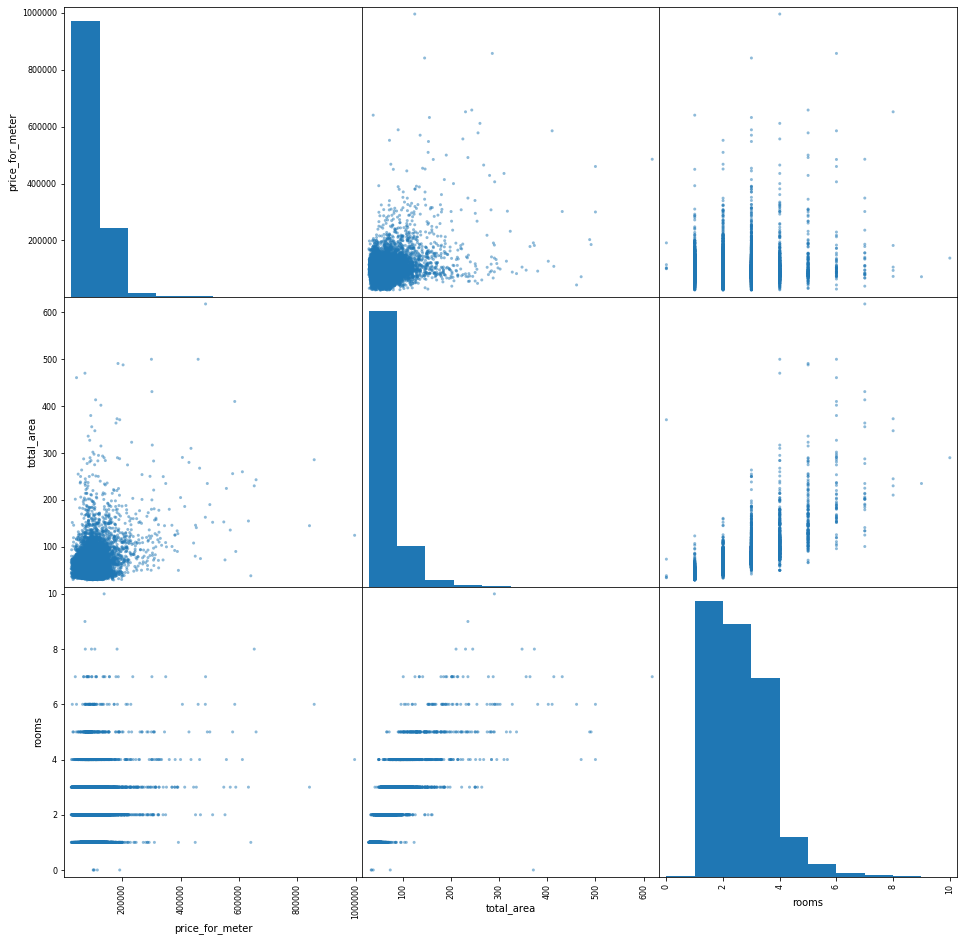

In [185]:
#Посмотрим диаграммы рассеяния
pd.plotting.scatter_matrix(data_flat_query_matrix, figsize=(16, 16))

#### На графиках рассеяния явной зависимости цены квадратного метра и количеством комнат, либо площадью квартиры не видно.

In [186]:
# Перед изучением цены продажи от расстояния квартиры до центра выкинем пропущенные значения
data_flat_query = data_flat_query.dropna(subset=['cityCenters_nearest'])

In [187]:
#Проверяем
data_flat_query['cityCenters_nearest'].isna().mean()

0.0

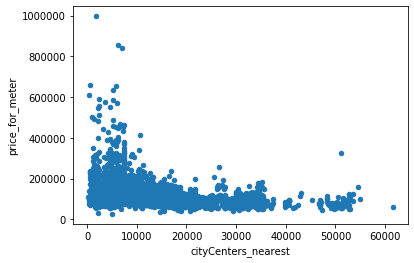

In [188]:
# Посмотрим гистограмму
data_flat_query.plot(x='cityCenters_nearest', y='price_for_meter', kind='scatter')

#### Для квартир в самом центре города разброс цены в большую сторону значительно выше. 

In [189]:
#Выделим параметры стоимость квадратного метра, день недели, месяц, год
data_flat_query_matrix = data_flat_query.loc[:, ['price_for_meter', 'weekday', 'month', 'year']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21db7674d0>,
      dtype=object)

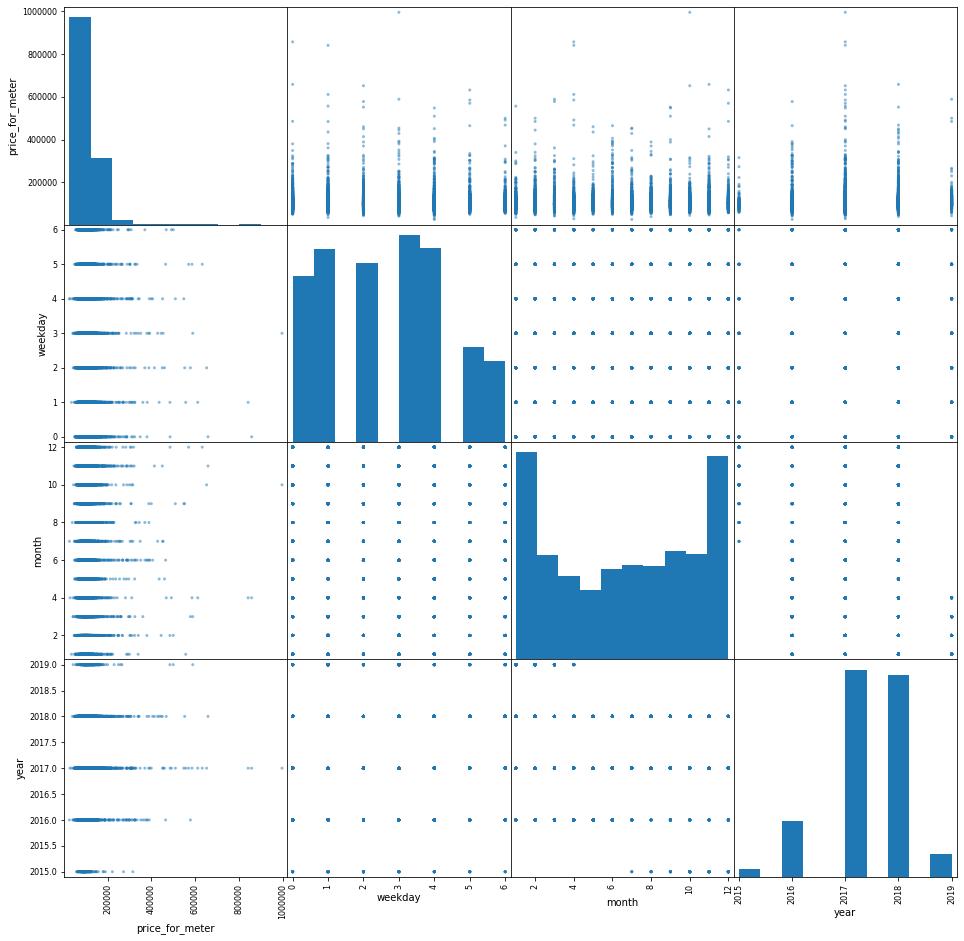

In [190]:
# Посморим рассеяние
pd.plotting.scatter_matrix(data_flat_query_matrix, figsize=(16, 16))

#### Явной зависимотси между ценой продажи и днем недели выставления объявления нет. Зависимости от месяца так же нет, хотя разброс цен в апреле и мае несколько выше.  В 2015 и 2016 году цена продажи была в среднем ниже, чем в 2017 году. В 2017 году разброс цен выше. Но нельзя утверждать, что со временем цена квартир увеличивается.

In [191]:
# Введем функцию, которая классифицирует этаж квартиры
def floor_matrix(row):
    if row[24] == 'первый':
        return 1
    elif row[24] == 'последний':
        return 10
    else:
        return 5

In [192]:
#Применем ее к нашему датасету с созданием нового столбца
data_flat_query['floor_matrix'] = data_flat_query.apply(floor_matrix, axis = 1)

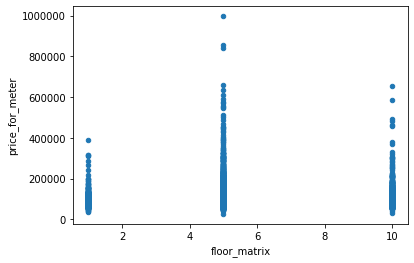

In [193]:
#Построим график
data_flat_query.plot(x='floor_matrix', y='price_for_meter', kind='scatter')

#### Можно заметить, что цены квадратного метра на 1-ом этаже ниже, чем на других. Самая высокая цена квадратного метра на средних этажах

#### 5) Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [194]:
#Выделим строку с 10 городами с наибольшим числом объявлений 
top_city = data_flat_query['locality_name'].value_counts().sort_values(ascending=False).head(10).index

In [195]:
#Делаем выборкуиз нашего датасета по эти 10 городам и средней стоимости квадратного метра квртрры в них
data_flat_top_city = data_flat_query.query('locality_name in @top_city').pivot_table(index='locality_name', values='price_for_meter', aggfunc='mean').reset_index()

In [196]:
#Отсортируем города по средней цене квадратного метра
data_flat_top_city = data_flat_top_city.sort_values(by = 'price_for_meter', ascending = False).reset_index()

In [197]:
#посмотрим результат
data_flat_top_city

,index,locality_name,price_for_meter
0,5,Санкт-Петербург,117462.749107
1,4,Пушкин,105709.037463
2,6,Сестрорецк,103709.918251
3,8,посёлок Парголово,87349.178850
4,3,Петергоф,84862.634026
5,9,посёлок Шушары,76779.524211
6,2,Кронштадт,75390.563796
7,0,Колпино,75202.108266
8,7,посёлок Металлострой,72377.167249
9,1,Красное Село,71576.425101


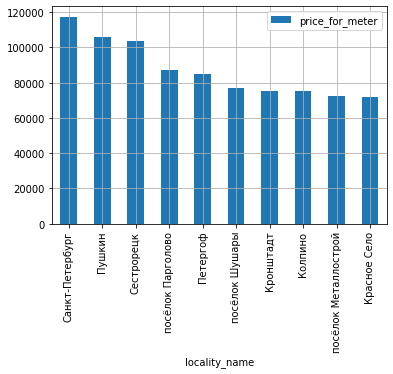

In [198]:
#Визуализируем
data_flat_top_city.plot(x='locality_name', y='price_for_meter', grid = True, kind = 'bar')

### Среди городов с наибольшим числом объявлений , самые дорогие цены за квадратный метр квартиры в Санкт-Петербурге, Пушкине и Сестрорецке, а вамые низкие цены в Красном Селе, Ломоносове и Кронштаде.

#### 6) Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [199]:
#отбираем Петербург    
city_center_price = data_flat_query.loc[data_flat_query['locality_name'] == 'Санкт-Петербург']

In [200]:
#создаем столбец с километрами
city_center_price['km_to_cityCenters'] = (city_center_price['cityCenters_nearest'] / 1000).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


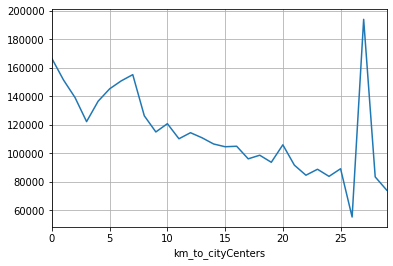

In [201]:
#Группипуем данные по средней цене квадратного метра и строим график
city_center_price_grouped = city_center_price.groupby(['km_to_cityCenters'])['price_for_meter'].mean().astype(int)
city_center_price_grouped.plot(x='km_to_cityCenters', y='price_for_meter', grid = True)

#### Цена за квадратный метр квартиры в Питере начинает резко падатьот 10 км от центра, можно принять эту зону за центр города. При этом на 27 метрах имеется скачок цен.

#### 7) Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [202]:
#Посмотрим основные параметры для Питера
#создаем столбец с километрами и избавляемся от пропусков
data_flat_query['km_to_cityCenters'] = (data_flat_query['cityCenters_nearest'] / 1000).astype(int)
data_flat_query = data_flat_query.dropna(subset=['km_to_cityCenters'])
data_flat_piter = data_flat_query.query('locality_name == "Санкт-Петербург"').groupby(['locality_name']).agg({'last_price':'median', 'price_for_meter':'median', 'total_area':'median', 'rooms':'median', 'ceiling_height':'mean', 'km_to_cityCenters':'mean'}).sort_values(by = 'price_for_meter', ascending = False)
#создаем столбец с километрами и избавляемся от пропусков
data_flat_piter

,last_price,price_for_meter,total_area,rooms,ceiling_height,km_to_cityCenters
locality_name,,,,,,
Санкт-Петербург,6500000.0,108249.200911,62.2,2,2.771007,11.02123


In [203]:
#Посмотрим основные параметры для центра Питера
data_flat_piter_center = city_center_price.query('km_to_cityCenters <= 10').groupby(['locality_name']).agg({'last_price':'median', 'price_for_meter':'median', 'total_area':'median', 'rooms':'median', 'ceiling_height':'mean', 'km_to_cityCenters':'mean'}).sort_values(by = 'price_for_meter', ascending = False)
data_flat_piter_center

,last_price,price_for_meter,total_area,rooms,ceiling_height,km_to_cityCenters
locality_name,,,,,,
Санкт-Петербург,8600000.0,119119.922631,75.35,3,2.880834,5.794892


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21db126510>,
      dtype=object)

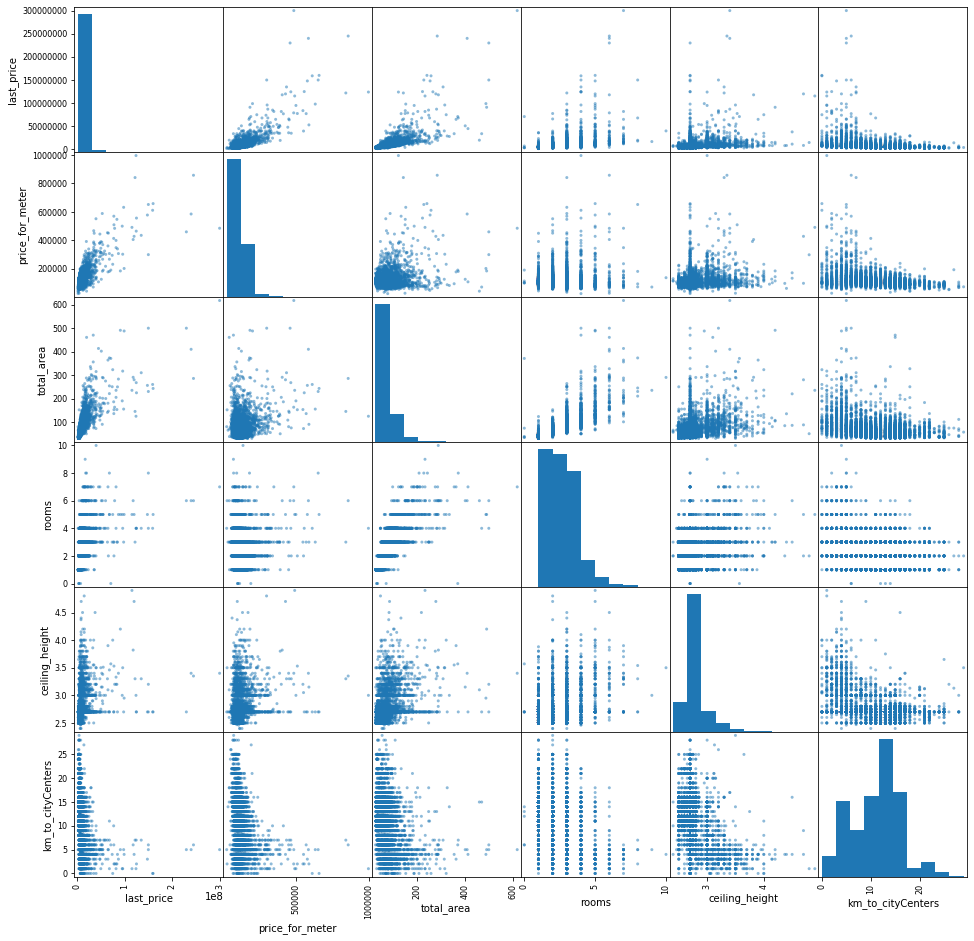

In [204]:
# Для Санкт-Петербурга посморим графики рассеивания
#Выделим параметры цена продащи, стоимость квадратного метра, площадь квартиры, количество комнат в отдельную таблицу
data_piter = data_flat_query.query('locality_name == "Санкт-Петербург"')
data_flat_piter_matrix = data_piter.query('locality_name == "Санкт-Петербург"').loc[:, ['last_price', 'price_for_meter', 'total_area', 'rooms', 'ceiling_height','km_to_cityCenters']]
#Посморим рассеяние
pd.plotting.scatter_matrix(data_flat_piter_matrix, figsize=(16, 16))

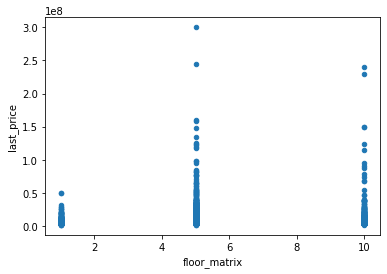

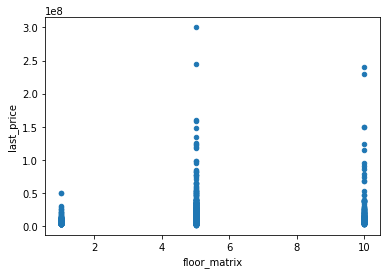

In [205]:
#Построим зависимость стоимости квартиры от этажа в Питетере и в центре Питера
data_piter.plot(x='floor_matrix', y='last_price', kind='scatter')
data_piter_center = data_piter.query('km_to_cityCenters <= 10')
data_piter_center.plot(x='floor_matrix', y='last_price', kind='scatter')

In [206]:
data_piter['floor_matrix'].value_counts()

5     5250
10     679
1      477
Name: floor_matrix, dtype: int64

In [207]:
#Посмотрим зависимость стоимости квартиры от месяца объявления в Питетере
data_piter['month'].value_counts()

2     734
11    680
9     601
10    597
3     584
7     530
8     515
6     493
4     459
12    442
1     386
5     385
Name: month, dtype: int64

In [208]:
#Посмотрим зависимость стоимости квартиры от года объявления в Питетере
data_piter['year'].value_counts()

2017    2692
2018    2595
2016     699
2019     314
2015     106
Name: year, dtype: int64

In [209]:
#Посмотрим зависимость стоимости квартиры от дня нидели объявления в Питетере
data_piter['weekday'].value_counts()

3    1197
1    1120
4    1113
2    1028
0     929
5     549
6     470
Name: weekday, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21da7bc510>,
      dtype=object)

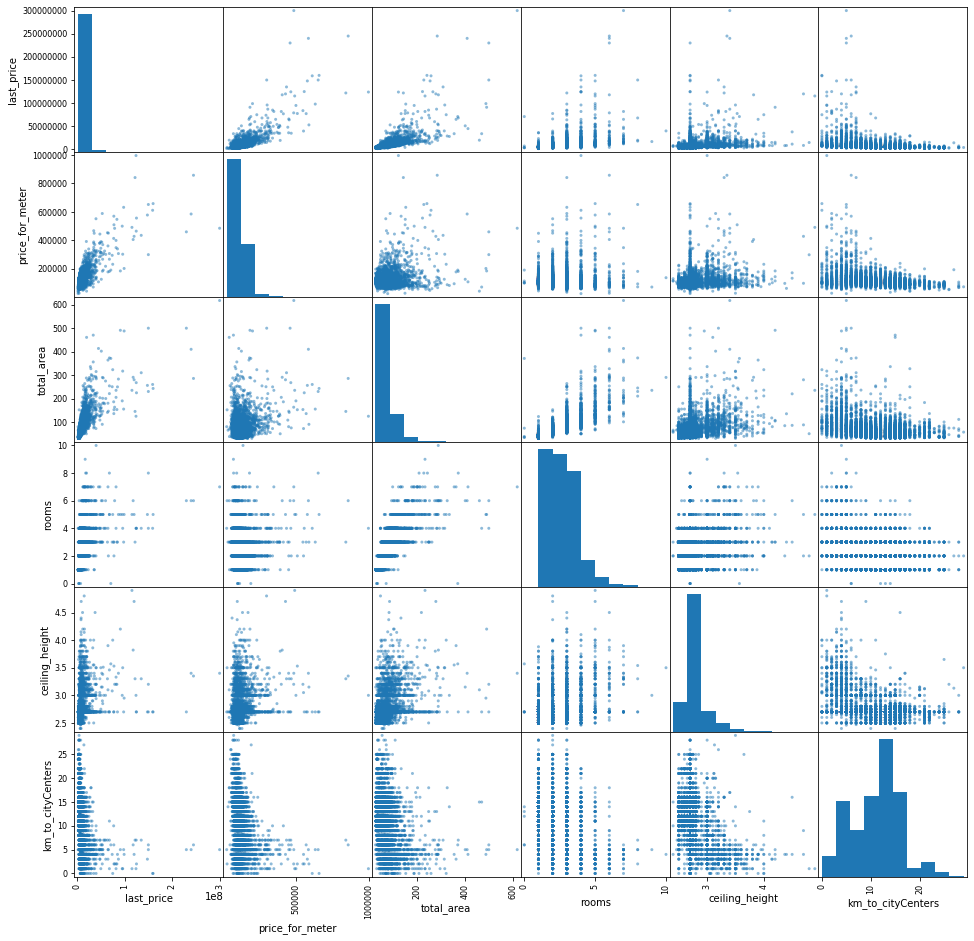

In [210]:
# Для центра Санкт-Петербурга посморим графики рассеивания
#Выделим параметры цена продажи, стоимость квадратного метра, площадь квартиры, количество комнат в отдельную таблицу
data_flat_matrix = data_piter.loc[:, ['last_price', 'price_for_meter', 'total_area', 'rooms', 'ceiling_height','km_to_cityCenters' ]]
# Посморим рассеяние
pd.plotting.scatter_matrix(data_flat_matrix, figsize=(16, 16))

In [211]:
data_piter_center['floor_matrix'].value_counts()

5     1925
10     368
1      213
Name: floor_matrix, dtype: int64

In [212]:
#Посмотрим зависимость стоимости квартиры от месяца объявления в Питетере
data_piter_center['month'].value_counts()

2     285
9     259
11    257
3     231
7     223
6     217
10    202
8     188
4     173
12    166
5     165
1     140
Name: month, dtype: int64

In [213]:
#Посмотрим зависимость стоимости квартиры от года объявления в Питетере
data_piter_center['year'].value_counts()

2017    1046
2018     997
2016     312
2019     102
2015      49
Name: year, dtype: int64

In [214]:
#Посмотрим зависимость стоимости квартиры от дня нeдели объявления в Питетере
data_piter_center['weekday'].value_counts()

3    485
4    443
1    433
2    378
0    377
5    224
6    166
Name: weekday, dtype: int64

#### Средняя стоимость квартиры в центре Питера примерно на 2.1М руб. выше, чем средняя по городу. Выше и общая площадь квартиры на 14 кв. метров. Цена одного квадратого метро отличается примерно на 10к. В центре в среднем 3-х комнатные квартиры против 2-х комнатных в среднем по городу. Высота потолков немного выше (10 см). Соотношение квартир на разных этажах примерно одинаковое. Соотношния объявлений по дням недели, месяцам и годам примерно одинаковое, тенденции похожи. Графики рассеивания схожи для квартир по всему городу и в центре.

### Шаг 5. Общий вывод

### Был предоставлен датасет с информацией о продаже квартир. Были заполнены пропуски в данных: высота потолков (по среднему значению), жилая площадь (в зависимости от количества комнат), площадь кухни (по среднему отношению к площади квартиры). Был заменен тип object у количества дней размещений, названия населенного пункта и апартаментах для удобства дальнейшей работы

### В датасет были добавлены новые столбцы с ценой квадратного метра, категоризацией этажа квартиры, днем недели, месяцем, годом публикаци объявления и соотношением жилой площади и кухни к общей площади квартиры.  

### По всей выборке до среза выбивающихся значений наиболее часто встречаются 1 и 2-х комнатные квартиры. Наиболее частые размеры 35-45 кв. метров. Имеется пик стоимости в районе 4 миллионов рублей. Наиболее часто встречающаяся высота потолков 2.45-3 метра. Больше всего квартир было продано через 1.5 месяца после выставления объявления.

### Были отрезаны выбивающиеся значения, например, высота потолков меньше 2 метров, площадь кухни меньше 8 метров и т д.

### Исследование диаграмм рассеивание показало прямую зависимость между ценой продажи и размером квартиры. Разброс цены увеличивается при увеличении числа комнат. Зависимости цены квартиры от расстояния до центра не такая явная, как для площади квартиры, но для квартир в самом центре города разброс цены в большую сторону значительно выше. Явной зависимотси между ценой продажи и днем недели выставления объявления нет. Зависимости от месяца так же нет, хотя разброс цен в апреле и мае несколько выше. В 2015 и 2016 году цена продажи была в среднем ниже, чем в 2017 году. В 2017 году разброс цен выше. Но нельзя утверждать, что со временем цена квартир увеличивается. Цены квартир на 1-ом этаже ниже, чем на других.

### Среди городов с наибольшим числом объявлений , самые дорогие цены за квадратный метр квартиры в Санкт-Петербурге, Пушкине и Сестрорецке, а вамые низкие цены в Красном Селе, Ломоносове и Кронштаде.

### Цена за квадратный метр квартиры в Питере начинает резко падатьот 10 км от центра, можно принять эту зону за центр города. При этом на 27 метрах имеется скачок цен.

### Средняя стоимость квартиры в центре Питера примерно на 2.1М руб. выше, чем средняя по городу. Выше и общая площадь квартиры на 14 кв. метров. Цена одного квадратого метро отличается примерно на 10к. В центре в среднем 3-х комнатные квартиры против 2-х комнатных в среднем по городу. Высота потолков немного выше (10 см). Соотношение квартир на разных этажах примерно одинаковое. Соотношния объявлений по дням недели, месяцам и годам примерно одинаковое, тенденции похожи. Графики рассеивания схожи для квартир по всему городу и в центре.